6490 6490
6490 6490
6490.0
[0.9749239  0.97558978 0.97694878 0.97844039 0.978443   0.97845728
 0.97846411 0.97851142 0.9785128  0.97853256]
['G1HTaAC-1a1CHTHE' 'GTa1HTaAC-1HTH1E' 'G1a1HTHTaAC-1HE' 'GaH1HTaAC-1H1E'
 'G1a1HTaAC-1HE' 'GHTaAC-1a1H1E' 'GTaAC-1a1H1HE' 'GHTaACT-1a1CH1E'
 'G1HTaAC-1H1aE' 'GTaAC-1a1H1HTHE']


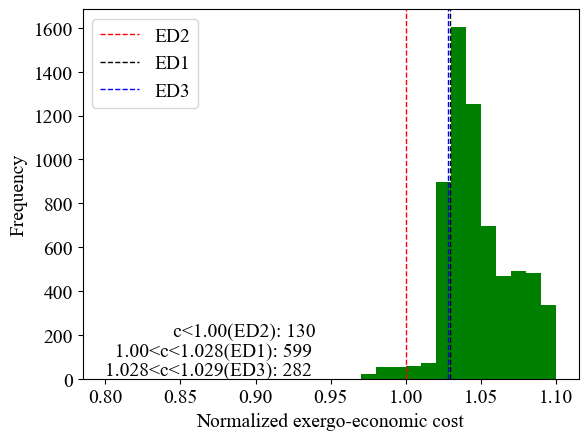

In [2]:
# Distribution of high-performance layouts
import matplotlib.pyplot as plt
import numpy as np
import config
from thermo_validity import validity
# times new roman font
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
# plt.figure(dpi=1000)
# layouts = np.load(
#     config.DATA_DIRECTORY/"First_year_trials/v4DF_m2_layouts.npy", allow_pickle=True
# )
# results = np.load(
#     config.DATA_DIRECTORY /"First_year_trials/v4DF_m2_results.npy", allow_pickle=True
# )
layouts = np.load(
    "Modified_Framework/M2_data_F240_layouts.npy", allow_pickle=True
)
results = np.load(
    "Modified_Framework/M2_data_F240_results.npy", allow_pickle=True
)

valid = validity(layouts)
unique = np.unique(valid)
print(len(valid), len(unique))
# layouts = unique
# print(len(layouts), len(results))

layouts2 = []
results2 = []
good_results = []
good_layouts = []
cutoff = 130.87 * 1.1
for i in range(len(results)):
    if results[i] > 0:
        results2.append(results[i])
        layouts2.append(layouts[i])
        if results[i] < cutoff:
            good_results.append(results[i])
            good_layouts.append(layouts[i])
layouts = np.asanyarray(layouts2)
results = np.asanyarray(results2)

print(len(layouts), len(results))
ed1 = 134.69
ed2 = 130.87
ed3 = 134.52
results = results / ed2
ed1, ed2, ed3 = ed1 / ed2, ed2 / ed2, ed3 / ed2
# bins = [ed2 * x / 100 for x in range(80, 111)]
bins = [x / 100 for x in range(80, 111)]
lessthan_ed2 = np.where(results < ed2)[0]
lessthan_ed1 = np.where(results < ed1)[0]
lessthan_ed3 = np.where(results < ed3)[0]
group1 = len(lessthan_ed2)
group2 = len(lessthan_ed3) - group1
group3 = len(lessthan_ed1) - group2 - group1
n, bins, patches = plt.hist(results, bins=bins, color="green")
print(sum(n))
# xlabel = "Exergo-economic cost ($/MWh)"
# plt.figure(dpi=600)
xlabel = "Normalized exergo-economic cost"
ylabel = "Frequency"
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title("PHI-PSI Min M2 8th Generation")
plt.axvline(ed2, color="red", linestyle="dashed", linewidth=1, label="ED2")
plt.axvline(ed1, color="black", linestyle="dashed", linewidth=1, label="ED1")
plt.axvline(ed3, color="blue", linestyle="dashed", linewidth=1, label="ED3")
plt.text(0.8, 195, "              c<1.00(ED2): " + str(group1))
plt.text(0.8, 105, "  1.00<c<1.028(ED1): " + str(group2))
plt.text(0.8, 15, "1.028<c<1.029(ED3): " + str(group3))
# plt.xlim(120, 150)
# plt.ylim(0, 25)
plt.legend()
# plt.savefig("MF.tiff", dpi=1000, bbox_inches="tight")

indices = np.argsort(results)
sorted_results = results[indices]
sorted_layouts = layouts[indices]
print(sorted_results[:10])
print(sorted_layouts[:10])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from config import DATA_DIRECTORY
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 10
plt.figure(dpi=1000)
def figure_8_9():
    cd = "Initial_Dataset/"
    save_path = cd+"LSTM_100"
    k =15
    ds100 = np.zeros(k)
    for i in range(1,k):
        dataset = np.load(save_path+f"/M1_data_{i}.npy", allow_pickle=True)
        ds100[i] = len(dataset)
    ds100[0] = 100
    print(ds100)
    save_path = cd+"LSTM_500"
    k = 10
    ds500 = np.zeros(k)
    for i in range(1,k):
        dataset = np.load(save_path+f"/M1_data_{i}.npy", allow_pickle=True)
        ds500[i] = len(dataset)
    ds500[0] = 500
    print(ds500)
    k=9
    ds1k = np.zeros(k)
    for i in range(1,k):
        dataset = np.load(DATA_DIRECTORY/f"v21D{i}_m1.npy", allow_pickle=True)
        ds1k[i] = len(dataset)
    ds1k[0] = 1000
    print(ds1k)
    k= 10
    save_path = "LSTM_1000"
    ds10k = np.array([10000,18412,27234,36298,45478,54891])
    ds50k = np.array([50000])
    ds100n = []
    k=15
    for i in range(1,k):
        novel_gen = ds100[i]-ds100[i-1]
        ds100n.append(novel_gen)
    print(ds100n)
    k=10
    ds500n = []
    for i in range(1,k):
        novel_gen = ds500[i]-ds500[i-1]
        ds500n.append(novel_gen)
    print(ds500n)
    k=9
    ds1kn = []
    for i in range(1,k):
        novel_gen = ds1k[i]-ds1k[i-1]
        ds1kn.append(novel_gen)
    print(ds1kn)
    k=6
    ds10kn = []
    for i in range(1,k):
        novel_gen = ds10k[i]-ds10k[i-1]
        ds10kn.append(novel_gen)
    print(ds10kn)
    # ds100 = [
    #     100,
    #     131,
    #     164,
    #     230,
    #     380,
    #     730,
    #     2758,
    #     7625,
    #     13684,
    #     20188,
    #     26516,
    #     33233,
    #     40088,
    #     46710,
    #     53329,
    # ]

    # ds1k = [
    #     1000,
    #     2176,
    #     7096,
    #     15337,
    #     24007,
    #     32858,
    #     41926,
    #     51085,
    # ]

    # ds10k = [
    #     10000,
    #     18536,
    #     27370,
    #     36511,
    #     45656,
    #     54947,
    # ]
    # ds50k = [50000]

    # x = np.arange(len(ds100))
    # plt.rcParams["font.family"] = "Times New Roman"
    # plt.rcParams["font.size"] = 14
    # plt.figure(dpi=1000)
    # plt.plot(x, ds100, label="100", marker="s")
    # plt.plot(x[: len(ds500)], ds500, label="500", marker="p")
    # plt.plot(x[: len(ds1k)], ds1k, label="1k", marker="v")
    # plt.plot(x[: len(ds10k)], ds10k, label="10k", marker="o")
    # plt.plot(x[: len(ds50k)], ds50k, label="50k", marker="X")
    # plt.tick_params(direction="in")
    # plt.xlabel("Iteration Steps")
    # plt.ylabel("Dataset Size")
    # # plt.title("Dataset Growth Over Iteration Steps")
    # plt.legend()
    # plt.savefig("Figure 8.tiff", dpi=1000, bbox_inches="tight")



    ds50kn = [9211]
   

    ds100n = np.asarray(ds100n) / 100
    ds500n = np.asarray(ds500n) / 100
    ds1kn = np.asarray(ds1kn) / 100
    ds10kn = np.asarray(ds10kn) / 100
    ds50kn = np.asarray(ds50kn) / 100

    x = np.arange(len(ds100n))
    plt.plot(x, ds100n, label="100", marker="s")
    plt.plot(x[: len(ds500n)], ds500n, label="500", marker="p")
    plt.plot(x[: len(ds1kn)], ds1kn, label="1k", marker="v")
    plt.plot(x[: len(ds10kn)], ds10kn, label="10k", marker="o")
    plt.plot(x[: len(ds50kn)], ds50kn, label="50k", marker="X")
    plt.xlabel("Iteration Steps")
    plt.tick_params(direction="in")
    plt.ylabel("Percentage of Novel Designs (%)")
    plt.legend()
    # plt.savefig("Figure 9.tiff", dpi=1000, bbox_inches="tight")

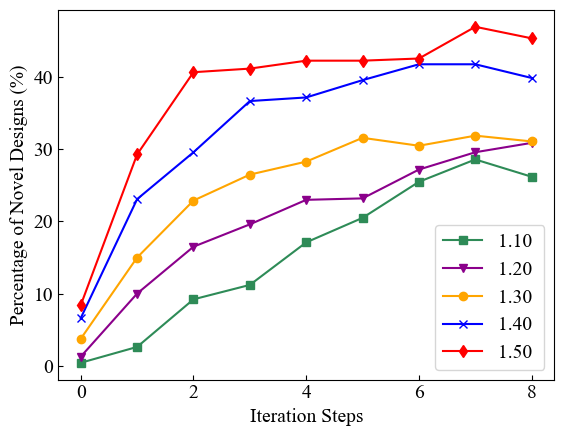

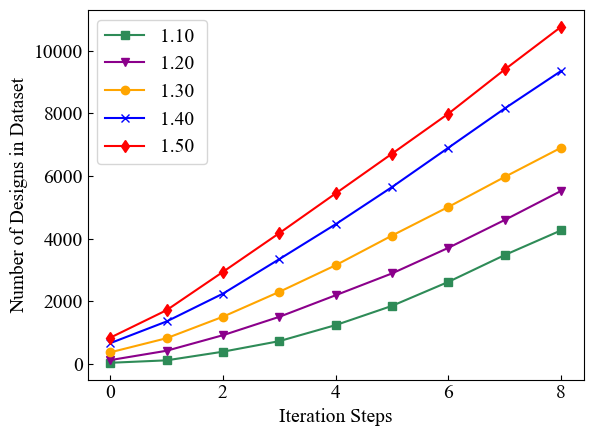

In [3]:
#Threshold Effects Waiting for new data
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.figure()
def figure_10():
    # HPGvG = [
    #     5.4,
    #     15.9,
    #     23.0,
    #     25.2,
    #     24.0,
    #     25.8,
    #     26.5,
    #     26.2,
    # ]
    # HPGvN = [
    #     6.1,
    #     20.6,
    #     34.7,
    #     40.7,
    #     41.6,
    #     46.1,
    #     48.0,
    #     49.6,
    # ]
    # x = np.arange(len(HPGvG))
    # plt.plot(x, HPGvN, label="Generated(Novel)", marker="v", color="pink")
    # plt.plot(x, HPGvG, label="Generated(Total)", marker="x", color="purple")
    # plt.tick_params(direction="in")
    # plt.xlabel("Iteration Steps")
    # plt.ylabel("Percentage of High-Performance Designs (%)")
    # plt.title("M2 Generation Performance")
    # plt.legend()
    # plt.show()

    obj144 = [
        0.4,
        10.8,
        19.9,
        18.7,
        19.8,
        20.0,
        19.8,
        20.1,
        20.3,
    ]
    obj164 = [
        2.9,
        23.7,
        29.7,
        30.1,
        34.0,
        32.9,
        31.4,
        32.2,
        31.1,
    ]
    x = np.arange(len(obj144))
    plt.plot(x, obj164, label="Lenient Threshold (1.25)", marker="s", color="seagreen")
    plt.plot(x, obj144, label="Stricter Threshold (1.10)", marker="v", color="darkmagenta")
    plt.tick_params(direction="in")
    plt.xlabel("Iteration Steps")
    plt.ylabel("Percentage of Novel Designs (%)")
    plt.title("Obj. Fun. Value Threshold Effects on Generation Performance")
    plt.legend()
    plt.show()
    plt.savefig("Figure 10_1.tiff", dpi=1000, bbox_inches="tight")

    obj144 = [
        43,
        367,
        963,
        1523,
        2116,
        2716,
        3311,
        3913,
        4522,
    ]
    obj164 = [287, 998, 1890, 2794, 3814, 4801, 5742, 6709, 7643]
    x = np.arange(len(obj144))
    plt.plot(x, obj164, label="Lenient Threshold (1.25)", marker="s", color="seagreen")
    plt.plot(x, obj144, label="Stricter Threshold (1.10)", marker="v", color="darkmagenta")
    plt.tick_params(direction="in")
    plt.xlabel("Iteration Steps")
    plt.ylabel("Number of High-perfomance Designs")
    plt.title("Obj. Fun. Value Threshold Effects on Dataset Size")
    plt.legend()
    plt.show()
    plt.savefig("Figure 10_2.tiff", dpi=1000, bbox_inches="tight")

def new_figure_10():
    obj11n = [
        0.4,
        2.6,
        9.2,
        11.2,
        17.1,
        20.5,
        25.5,
        28.6,
        26.2,
    ]
    obj12n = [
       1.25,
        10.0,
        16.5,
        19.6,
        23.0,
        23.2,
        27.2,
        29.6,
        30.9,
    ]
    obj13n = [
        3.73,
        15.0,
        22.9,
        26.5,
        28.3,
        31.6,
        30.5,
        31.9,
        31.1,
    ]
    obj14n = [
        6.6,
        23.1,
        29.6,
        36.7,
        37.2,
        39.6,
        41.8,
        41.8,
        39.9,
    ]

    obj15n = [
        8.4,
        29.3,
        40.7,
        41.2,
        42.3,
        42.3,
        42.6,
        47.0,
        45.4,
    ]

    x = np.arange(len(obj11n))
    plt.plot(x, obj11n, label="1.10 ", marker="s", color="seagreen")
    plt.plot(x, obj12n, label="1.20 ", marker="v", color="darkmagenta")
    plt.plot(x, obj13n, label="1.30 ", marker="o", color="orange")
    plt.plot(x, obj14n, label="1.40 ", marker="x", color="blue")
    plt.plot(x, obj15n, label="1.50 ", marker="d", color="red")
    plt.tick_params(direction="in")
    plt.xlabel("Iteration Steps")
    plt.ylabel("Percentage of Novel Designs (%)")
    plt.legend()
    plt.savefig("Figure 10_1.tiff", dpi=1000, bbox_inches="tight")
    plt.show()
    obj11 = [
        40,
        118,
        394,
        731,
        1243,
        1857,
        2623,
        3480,
        4267,
    ]
    obj12 = [
        125,
        424,
        920,
        1507,
        2196,
        2893,
        3710,
        4599,
        5527,
    ]
    obj13 = [
        373,
        824,
        1510,
        2304,
        3154,
        4101,
        5015,
        5973,
        6906,
    ]
    obj14 = [
        666,
        1359,
        2247,
        3348,
        4463,
        5650,
        6904,
        8159,
        9355,
    ]
    obj15 = [
        841,
        1719,
        2941,
        4178,
        5446,
        6715,
        7992,
        9402,
        10765,
    ]
    x = np.arange(len(obj11))
    plt.plot(x, obj11, label="1.10 ", marker="s", color="seagreen")
    plt.plot(x, obj12, label="1.20 ", marker="v", color="darkmagenta")
    plt.plot(x, obj13, label="1.30 ", marker="o", color="orange")
    plt.plot(x, obj14, label="1.40 ", marker="x", color="blue")
    plt.plot(x, obj15, label="1.50 ", marker="d", color="red")
    plt.tick_params(direction="in")
    plt.xlabel("Iteration Steps")
    plt.ylabel("Number of Designs in Dataset")
    plt.legend()
    plt.savefig("Figure 10_2.tiff", dpi=1000, bbox_inches="tight")
    plt.show()

new_figure_10()

In [ ]:
# ## Decoding strategies in M1
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.figure(dpi=1000)
def figure_12():
    sampling = [
        1000,
        2208,
        5422,
        9314,
        16791,
        25571,
        34383,
        43132,
        52019,
        61004,
        70000,
        79102,
    ]

    topp9 = [
        1000,
        2685,
        10040,
        18739,
        27550,
        36333,
        45160,
        53846,
        62727,
        71553,
        80417,
        89433,
    ]

    topp75 = [
        1000,
        1429,
        3274,
        5984,
        8056,
        10793,
        13273,
        15459,
        17618,
        19437,
        21067,
        22294,
    ]

    topp50 = [
        1000,
        1102,
        1282,
        1666,
        1707,
        1734,
        1770,
        1781,
        1804,
        1817,
        1824,
        1875,
    ]

    topk5 = [
        1000,
        3030,
        7541,
        15820,
        24542,
        33252,
        42135,
        51080,
        59955,
        68800,
        77889,
        86999,
    ]

    topk3 = [
        1000,
        1576,
        4044,
        8110,
        12612,
        17908,
        23042,
        27920,
        33268,
        38272,
        43709,
        49121,
    ]

    # sampling = [
    #     14.22,
    #     34.98,
    #     40.69,
    #     77.84,
    #     91.32,
    #     92.46,
    #     92.34,
    #     93.42,
    #     93.87,
    #     94.55,
    #     95.37,
    # ]
    sampling = [
        12.08,
        32.14,
        38.92,
        74.77,
        87.8,
        88.12,
        87.49,
        88.87,
        89.85,
        89.96,
        91.02,
    ]

    # topp9 = [
    #     21,
    #     83.09,
    #     94.9,
    #     95.97,
    #     96.49,
    #     97.24,
    #     96.99,
    #     97.74,
    #     97.44,
    #     97.64,
    #     98.09,
    # ]
    topp9 = [
        16.85,
        73.55,
        86.99,
        88.11,
        87.83,
        88.27,
        86.86,
        88.81,
        88.26,
        88.64,
        90.16,
    ]
    # topp75 = [
    #     11.36,
    #     48.98,
    #     96.43,
    #     97.94,
    #     99.25,
    #     99.68,
    #     99.73,
    #     99.82,
    #     99.67,
    #     99.59,
    #     99.6,
    # ]
    topp75 = [
        4.29,
        18.45,
        27.1,
        20.72,
        27.37,
        24.8,
        21.86,
        21.59,
        18.19,
        16.3,
        12.27,
    ]
    # topp50 = [
    #     16.1,
    #     34.45,
    #     41.82,
    #     93.85,
    #     90.89,
    #     98.08,
    #     94.81,
    #     92.36,
    #     95.53,
    #     96.74,
    #     95.75,
    # ]
    topp50 = [
        1.02,
        1.8,
        3.84,
        0.41,
        0.27,
        0.36,
        0.11,
        0.23,
        0.13,
        0.07,
        0.51,
    ]
    # topk5 = [
    #     26.49,
    #     51.04,
    #     90.11,
    #     93.25,
    #     93.69,
    #     94.41,
    #     95.36,
    #     94.6,
    #     95.96,
    #     96,
    #     96.26,
    # ]
    topk5 = [
        20.3,
        45.11,
        82.79,
        87.22,
        87.1,
        88.83,
        89.45,
        88.75,
        88.45,
        90.89,
        91.1,
    ]
    # topk3 = [
    #     28.04,
    #     71.63,
    #     88.86,
    #     94.67,
    #     97.63,
    #     99.26,
    #     98.6,
    #     98.66,
    #     99.28,
    #     99.4,
    #     99.5,
    # ]

    topk3 = [
        5.76,
        24.68,
        40.66,
        45.02,
        52.96,
        51.34,
        48.78,
        53.48,
        50.04,
        54.37,
        54.12,
    ]

    plt.scatter(range(len(sampling)), sampling, label="M.Sampling", marker="s")
    plt.scatter(range(len(topp9)), topp9, label="Top-p(0.9)", marker="v")
    plt.scatter(range(len(topp75)), topp75, label="Top-p(0.75)", marker="o")
    plt.scatter(range(len(topp50)), topp50, label="Top-p(0.5)", marker="X")
    plt.scatter(range(len(topk5)), topk5, label="Top-k(5)", marker="^")
    plt.scatter(range(len(topk3)), topk3, label="Top-k(3)", marker="D")
    # plt.plot(sampling, label="M.Sampling", marker="s")
    # plt.plot(topp9, label="Top-p(0.9)", marker="v")
    # plt.plot(topp75, label="Top-p(0.75)", marker="o")
    # plt.plot(topp50, label="Top-p(0.5)", marker="X")
    # plt.plot(topk5, label="Top-k(5)", marker="^")
    # plt.plot(topk3, label="Top-k(3)", marker="D")
    plt.xticks(range(len(sampling)))
    plt.xlabel("Iteration Steps")
    plt.tick_params(direction="in")
    plt.ylabel("Validity of generation (%)")
    # plt.title("Dataset Growth Over Iteration Steps")
    # plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    # plt.annotate("1000", (0, 1000), textcoords="offset points", xytext=(0, 10), ha="center")
    # last_points = [sampling[-1], topp9[-1], topp75[-1], topp50[-1], topk5[-1], topk3[-1]]
    # for i, txt in enumerate(last_points):
    #     if i == 1:
    #         plt.annotate(
    #             txt, (11, txt), textcoords="offset points", xytext=(1, 5), ha="center"
    #         )
    #     else:
    #         plt.annotate(
    #             txt, (11, txt), textcoords="offset points", xytext=(1, 1), ha="center"
    # )
    plt.savefig("Figure 12_3.tiff", dpi=1000, bbox_inches="tight")

In [ ]:
# Decoding strategies in M2
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
def figure_13():
    sampling = [
        26,
        106,
        338,
        816,
        1484,
        2247,
        3025,
        3810,
        4594,
    ]

    topp9 = [
        28,
        171,
        427,
        784,
        1076,
        1355,
        1616,
        1824,
        2041,
    ]

    topk5 = [
        18,
        91,
        393,
        1030,
        1829,
        2599,
        3389,
        4192,
        4942,
    ]

    topk3 = [
        13,
        123,
        292,
        516,
        835,
        1166,
        1545,
        1913,
        2233,
    ]
    sampling = [
        0.3,
        2.7,
        7.7,
        15.9,
        22.3,
        25.4,
        25.9,
        26.2,
        26.1,
    ]
    topp9 = [
        0.3,
        4.8,
        8.5,
        11.9,
        9.7,
        9.3,
        8.7,
        6.9,
        7.2,
    ]
    topk5 = [
        0.2,
        2.4,
        10.1,
        21.2,
        26.6,
        25.7,
        26.3,
        26.8,
        25.0,
    ]
    topk3 = [
        0.1,
        3.7,
        5.6,
        7.5,
        10.6,
        11.0,
        12.6,
        12.3,
        10.7,
    ]


    plt.scatter(range(len(sampling)), sampling, label="M.Sampling", marker="s")
    plt.scatter(range(len(topp9)), topp9, label="Top-p(0.9)", marker="v")
    plt.scatter(range(len(topk5)), topk5, label="Top-k(5)", marker="o")
    plt.scatter(range(len(topk3)), topk3, label="Top-k(3)", marker="X")
    plt.xticks(range(len(sampling)))
    # plt.plot(sampling, label="M.Sampling")
    # plt.plot(topp9, label="Top-p(0.9)")
    # plt.plot(topk5, label="Top-k(5)")
    # plt.plot(topk3, label="Top-k(3)")
    plt.xlabel("Iteration Steps")
    # plt.ylabel("Dataset Size")
    plt.tick_params(direction="in")
    plt.ylabel("Novelty of HP design generation (%)")

    plt.legend()
    plt.savefig("Figure 13_2.tiff", dpi=1000, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
def figure_15():
    x = np.arange(8)
    Transformer = [
    70,
    224,
    705,
    1263,
    1718,
    2147,
    2529,
    2864,
    ]
    LSTM = [
    28,
    171,
    427,
    784,
    1076,
    1355,
    1616,
    1824,
    ]
    LSTM_novelty = [
    85.8,
    41.4,
    33.6,
    26.2,
    25.5,
    22.1,
    17.5,
    18.8,
    ]
    Transformer_novelty = [
    81.9,
    54.5,
    42.5,
    30.2,
    30.6,
    27.8,
    23.1,
    22.8,
    ]
    fig,ax1 = plt.subplots()
    color1 = mcolors.CSS4_COLORS["darkblue"]
    color2 = mcolors.CSS4_COLORS["royalblue"]
    color3 = mcolors.CSS4_COLORS["darkred"]
    color4 = mcolors.CSS4_COLORS["salmon"]
    ax1.set_ylabel('Percentage of novel generation (%)', color="blue")
    ax1.scatter(x[:8], LSTM_novelty, label="LSTM Novelty", marker="v", color=color1)
    ax1.scatter(x[:8], Transformer_novelty, label="Transformer Novelty", marker="o", color=color2)
    ax1.tick_params(axis='y', labelcolor="blue")
    ax2 = ax1.twinx()
    ax2.set_xlabel('Iteration Steps')
    ax2.set_ylabel('Dataset size', color="red")
    ax2.plot(x, LSTM, label="LSTM", marker="v", color=color3)
    ax2.tick_params(axis='y', labelcolor="red")
    ax2.plot(x, Transformer, label="Transformer", marker="o", color=color4)
    ax1.legend(loc="upper center", bbox_to_anchor=(0.3, 1))
    ax2.legend(loc="upper center", bbox_to_anchor=(0.7, 1))
    plt.savefig("Figure 15.tiff", dpi=1000, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
def figure_1617():
    x = np.arange(12)
    GPT_FA = [
        1000,
    9404,
    18978,
    28694,
    38528,
    48330,
    58130,
    67999,
    77834,
    87698,
    97574,
    107442,
    ]

    GPT_A = [
        1000,
    8330,
    17735,
    27388,
    36815,
    46562,
    56332,
    66111,
    75902,
    85644,
    95485,
    105269,
    ]

    GPT_NA =[
        1000,
    4126,
    12515,
    21494,
    30434,
    39498,
    48713,
    58005,
    67220,
    76429,
    85659,
    94920,
    ]

    LSTM_FA = [
        1000,
    8291,
    17107,
    26541,
    36100,
    45700,
    55387,
    65127,
    74884,
    ]
    LSTM_A = [
        1000,
    7902,
    15852,
    25173,
    34357,
    44013,
    53754,
    63247,
    73075,
    82795,
    92569,
    101970,
    ]

    LSTM_NA = [
        1000,
    2208,
    5422,
    9314,
    16791,
    25571,
    34383,
    43132,
    52019,
    61004,
    70000,
    79102,
    ]
    #M2 data
    GPT_FA = [
        17,
    351,
    663,
    1076,
    1517,
    2083,
    2638,
    3213,
    3716,
    ]
    GPT_A = [
        32,
    410,
    1234,
    2265,
    3269,
    4258,
    5263,
    6140,
    7041,
    ]
    GPT_NA = [
        70,
    224,
    705,
    1263,
    1718,
    2147,
    2529,
    2864,
    3121,
    ]
    LSTM_FA = [
        27,
    392,
    1443,
    2834,
    4307,
    5888,
    7509,
    9097,
    10718,
    ]
    LSTM_A = [
        25,
    113,
    288,
    783,
    1820,
    3085,
    4598,
    6098,
    7601,
    ]
    LSTM_NA = [
        40,
    118,
    394,
    731,
    1243,
    1857,
    2623,
    3480,
    4267,
    ]
    plt.plot(x[:len(GPT_FA)], GPT_FA, label="GPT-FA", marker="s")
    plt.plot(x[:len(GPT_A)], GPT_A, label="GPT-A", marker="v")
    plt.plot(x[:len(GPT_NA)], GPT_NA, label="GPT-NA", marker="p")
    plt.plot(x[:len(LSTM_FA)], LSTM_FA, label="LSTM-FA", marker="o")
    plt.plot(x[:len(LSTM_A)], LSTM_A, label="LSTM-A", marker="X")
    plt.plot(x[:len(LSTM_NA)], LSTM_NA, label="LSTM-NA", marker="D")
    plt.xlabel("Iteration steps")
    plt.ylabel("Dataset size")
    plt.xticks(x[:len(GPT_A)])
    plt.tick_params(direction="in")
    plt.legend()
    plt.savefig("Figure 17.tiff", dpi=1000, bbox_inches="tight")

In [ ]:
import numpy as np
from thermo_validity import validity
def data_vis (generated,results):
    p_dataset = np.load("GPT_NA_psitest/M2_data_8_layouts.npy", allow_pickle=True)
    p_results = np.load("GPT_NA_psitest/M2_data_8_results.npy", allow_pickle=True)
    valid = validity(generated)
    unique = np.unique(valid)
    mixed_results = np.concatenate((p_results, results), axis=0)
    mixed_dataset = np.concatenate((p_dataset, unique), axis=0)
    #sort the mixed dataset according the lowest scores
    mixed_results = np.array(mixed_results)
    mixed_dataset = np.array(mixed_dataset)
    sorted_index = np.argsort(mixed_results)
    mixed_results = mixed_results[sorted_index]
    mixed_dataset = mixed_dataset[sorted_index]
    final_results = []
    for v in valid:
        index_v = np.where(np.isin(mixed_dataset, v))[0][0]
        final_results.append(mixed_results[index_v])
    print(len(final_results))
    good_results = 0
    cutoff = 144
    for i in range(len(final_results)):
        if final_results[i] < cutoff and final_results[i] > 0:
            good_results += 1
    final_results = [x for x in final_results if x > 0]
    print("minimum result:", min(final_results))
    print("Good results:", good_results)
    print("Good results ratio:", good_results/len(final_results))
    return final_results
generated = np.load("GPT_NA_psitest/psiphi_generated_M2_8_aug_top50_144.npy",allow_pickle=True)
results = np.load("GPT_NA_psitest/results_candidates_8_psi_aug_top50_1440.npy")
top50psi = data_vis(generated,results)
generated = np.load("GPT_NA_psitest/generated_M2_8.npy",allow_pickle=True)
results = np.load("GPT_NA_psitest/results_candidates_8.npy")
d8phi = data_vis(generated,results)
generated = np.load("GPT_NA_psitest/psiphi_generated_M2_8_aug_144.npy",allow_pickle=True)
results = np.load("GPT_NA_psitest/results_candidates_8_psi_aug_1440.npy")
psi144 = data_vis(generated,results)
generated = np.load("GPT_NA_psitest/psiphi_generated_M2_8_aug_300.npy",allow_pickle=True)
results = np.load("GPT_NA_psitest/results_candidates_8_psi_aug_3000.npy")
psi300 = data_vis(generated,results)

import matplotlib.pyplot as plt
results = [d8phi, top50psi, psi144, psi300]
labels = ["d8phi", "psitop50", "psi144", "psi300"]
#violin plot
fig = plt.figure(figsize =(10, 5))
plt.violinplot(results, showmedians=True)
plt.xticks([1, 2, 3, 4], labels)
plt.title("Distribution of Results")
plt.ylim(125, 155)




In [ ]:
# bobj = [
#     # 133.48,
#     133.83,
#     133.45,
#     129.46,
#     129.41,
#     128.15,
#     128.11,
#     129.93,
#     129.45,
# ]
# bobj_labels = [
#     # "TAaACH-1a1T1H",
#     "TaAC-1CH1TaH1",
#     "TaAC-1C1H1aH",
#     "TaAC-1a1HT1CH",
#     "TaAC-1HT1aH1H",
#     "TaAC-1H1TaH1H",
#     "TaACT-1H1aH1H",
#     "TaAC-1HT1CaH1H",
#     "TaAC-1H1a1CTH",
# ]
# x = np.arange(len(bobj))
# regres = [-0.6377, 132.46]
# trendline = regres[0] * x + regres[1]
# plt.plot(x, trendline, label="Trendline", color="blue", linestyle="dotted")
# plt.scatter(x, bobj, label="Best Objective Function Value", marker="o", color="blue")
# for i, txt in enumerate(bobj_labels):
#     plt.annotate(
#         txt, (x[i], bobj[i]), textcoords="offset points", xytext=(0, 10), ha="center"
#     )
# plt.tick_params(direction="in")
# plt.xlabel("Iteration Steps")
# plt.ylabel("Objective Function Value ($/MWh)")
# plt.title("Best Perfoming Design Over Iteration Steps")
# plt.legend()
# plt.show()
